# Intro 

In [1]:
import numpy as np

import matplotlib.pyplot as plt

import pandas as pd

from scipy import stats

import xarray as xa

from scipy.stats import t

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression

import methods

In [2]:
all0205 = xa.open_dataset("../daa/atropics/CERES_FluxByCldTyp-MON_Terra-Aqua-MODIS_Ed4.1_Subset_200207-200505.nc", engine='netcdf4')
all0508 = xa.open_dataset("../daa/atropics/CERES_FluxByCldTyp-MON_Terra-Aqua-MODIS_Ed4.1_Subset_200506-200804.nc", engine='netcdf4')
all0811 = xa.open_dataset("../daa/atropics/CERES_FluxByCldTyp-MON_Terra-Aqua-MODIS_Ed4.1_Subset_200805-201103.nc", engine='netcdf4')
all1114 = xa.open_dataset("../daa/atropics/CERES_FluxByCldTyp-MON_Terra-Aqua-MODIS_Ed4.1_Subset_201104-201402.nc", engine='netcdf4')
all1417 = xa.open_dataset("../daa/atropics/CERES_FluxByCldTyp-MON_Terra-Aqua-MODIS_Ed4.1_Subset_201403-201701.nc", engine='netcdf4')
all1821 = xa.open_dataset("../daa/atropics/CERES_FluxByCldTyp-MON_Terra-Aqua-MODIS_Ed4.1_Subset_201702-201912.nc", engine='netcdf4')
all2123 = xa.open_dataset("../daa/atropics/CERES_FluxByCldTyp-MON_Terra-Aqua-MODIS_Ed4.1_Subset_202001-202211.nc", engine='netcdf4')
all2223 = xa.open_dataset("../daa/atropics/CERES_FluxByCldTyp-MON_Terra-Aqua-MODIS_Ed4.1_Subset_202212-202302.nc", engine='netcdf4')

In [3]:
var = "toa_lw"
alllw = xa.concat( [all0205[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_lw_clr_mon"]],
                    all0508[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_lw_clr_mon"]],
                    all0811[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_lw_clr_mon"]],
                    all1114[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_lw_clr_mon"]],
                    all1417[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_lw_clr_mon"]],
                    all1821[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_lw_clr_mon"]],
                    all2123[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_lw_clr_mon"]],], 
               dim='time')

In [4]:
var = "toa_sw"
allsw = xa.concat( [all0205[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_sw_clr_mon"]],
                    all0508[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_sw_clr_mon"]],
                    all0811[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_sw_clr_mon"]],
                    all1114[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_sw_clr_mon"]],
                    all1417[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_sw_clr_mon"]],
                    all1821[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_sw_clr_mon"]],
                    all2123[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_sw_clr_mon"]],], 
               dim='time')

In [53]:
itcz = slice(-0.5, 20.5) #slice(5,15)
trop = slice(-30,30)
wp = slice(120,160)
cp = slice(160,200)
ep = slice(210,260)
wa = slice(80,150)
ocean_only = slice(110,270)
warm_pool = slice(-15,15)
ragutime = slice('2002-07-01T00:00:00.000000000','2020-12-15T00:00:00.000000000')
enso16 = slice('2015-06-15T00:00:00.000000000','2016-06-15T00:00:00.000000000')
enso10 = slice('2009-06-15T00:00:00.000000000','2010-06-15T00:00:00.000000000')
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [6]:
sst = xa.open_dataset("../daa/sst_mon_mean.nc", engine='netcdf4')
sst_trop = sst.sst.sel(time=ragutime, lon=trop ).mean(['lat', 'lon'])
sst_itcz = sst.sst.sel(time=ragutime, lat=slice(20.5,-0.5), lon=itcz).mean(['lat', 'lon'])
sst_wp = sst.sst.sel(time=ragutime, lat=slice(20.5,-0.5), lon=wp ).mean(['lat', 'lon'])
sst_ep = sst.sst.sel(time=ragutime, lat=slice(20.5,-0.5), lon=ep ).mean(['lat', 'lon'])


In [7]:
#5
#Gistemp GMST anomalies
gmst1850 = pd.read_csv("../daa/GLB.Ts+dSST.csv", skiprows=[0])

gmst = gmst1850.loc[ gmst1850['Year'] >= 2002 ]
gmst = gmst.loc[ gmst['Year'] < 2021 ]
lista_gmst = gmst[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec']].values.flatten().tolist()
#lista_gmst, len(lista_gmst)
lista_gmst[6:]
#NOT the same as meaqning across all the values, which gives:0.7340974 , 0.23327379, 0.95729756, 0.8614268 , 0.7519227... 
gmst_anom_raghu = np.array(lista_gmst[6:], dtype=np.float16)
gmst_anom_raghu.shape

(222,)

In [8]:
mean0220 = np.mean(gmst_anom_raghu)
corregido = gmst_anom_raghu - mean0220

In [9]:
RclrLW_trop = alllw.sel(lat=trop,time=ragutime).toa_lw_clr_mon.mean(["lon"])
RovcLW_trop = alllw.sel(lat=trop,time=ragutime).toa_lw_cldtyp_mon.mean(["lon"])
lwK_trop = (RclrLW_trop - RovcLW_trop)/100

RclrSW_trop = allsw.sel(lat=trop,time=ragutime).toa_sw_clr_mon.mean("lon")
RovcSW_trop = allsw.sel(lat=trop,time=ragutime).toa_sw_cldtyp_mon.mean("lon")
swK_trop = (RclrSW_trop - RovcSW_trop)/100

K_trop = lwK_trop + swK_trop

In [10]:
#2
area_trop = alllw.cldarea_cldtyp_mon.sel(lat=trop, time=ragutime).mean("lon")
cc_trop_anom = area_trop.groupby('time.month')- area_trop.groupby('time.month').mean('time')

In [11]:
#3
lwR_trop = lwK_trop.mean("time")*cc_trop_anom
swR_trop = swK_trop.mean("time")*cc_trop_anom

In [12]:
#4
lwR_trop_mean = lwR_trop.mean(["lat"]) #.weighted(weights=weights)
swR_trop_mean = swR_trop.mean(["lat"]) #.weighted(weights=weights)

In [13]:
x = np.array([gmst_anom_raghu, sst_itcz])

In [14]:
optdim = [0,1,2,3,4,5]
pressdim = [0,1,2,3,4,5,6]

In [15]:
def reg_m(y, x):
    ones = np.ones(len(x[0]))
    X = sm.add_constant(np.column_stack((x[0], ones)))
    for ele in x[1:]:
        X = sm.add_constant(np.column_stack((ele, X)))
    results = sm.OLS(y, X).fit()
    return results

In [16]:

feed = np.zeros([len(pressdim), len(optdim)])
feed_st = np.zeros([len(pressdim), len(optdim)])

x = corregido.astype(np.float32)
#x = sm.add_constant(x)

for od in optdim:
    for p in pressdim:
        bints = lwR_trop_mean.sel(press=p, opt=od).data
        regress = sm.OLS(endog=bints, exog=x).fit()
        feed[p, od] = regress.params[0]
        feed_st[p, od] = regress.bse[0]

In [17]:
regress.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.065
Model:                            OLS   Adj. R-squared (uncentered):              0.061
Method:                 Least Squares   F-statistic:                              15.42
Date:                Mon, 13 Jan 2025   Prob (F-statistic):                    0.000115
Time:                        04:58:09   Log-Likelihood:                          379.11
No. Observations:                 222   AIC:                                     -756.2
Df Residuals:                     221   BIC:                                     -752.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0610      0.016      3.926      0.000       0.030       0.092
==============================================================================
Omnibus:                        0.878   Durbin-Watson:                   1.098
Prob(Omnibus):                  0.645   Jarque-Bera (JB):                0.574
Skew:                           0.065   Prob(JB):                        0.751
Kurtosis:                       3.212   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
regress.params, regress.bse

(array([0.06102622], dtype=float32), array([0.01554277], dtype=float32))

In [19]:
feed_r = xa.DataArray(
            feed,
            coords={
                "press": pressdim,
                "opt": optdim,
            },
        )

feed_stderr = xa.DataArray(
            feed_st,
            coords={
                "press": pressdim,
                "opt": optdim,
            },
        )


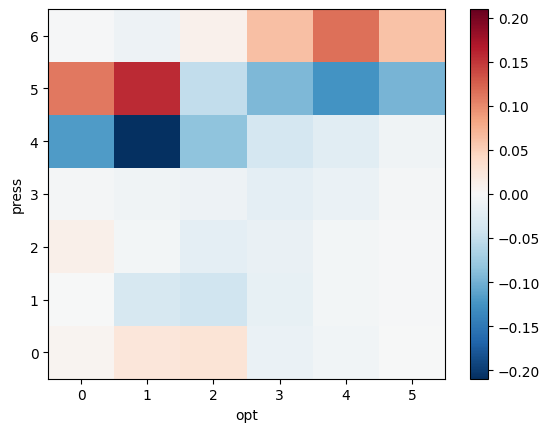

In [20]:
feed_r.plot()

In [21]:
sst_itcz_corregido = sst_itcz - sst_itcz.mean()
sst_itcz_corregido.mean()

<xarray.DataArray 'sst' ()>
array(-7.3029116e-07, dtype=float32)

In [22]:
def amt(area, k, gmst, high_clouds=True):
        if high_clouds:
            hc = [4, 5, 6]
        else:
            hc = []
        cc_anom = methods.anomaly(area)
        cTot = area.sum(["press", "opt"])
        cTot_anom = cc_anom.sum(["press", "opt"])
        area = area.sel(press=hc)
        k = k.sel(press=hc)

        K_0_hc = (((area.sel(press=hc) / cTot)) * k.sel(press=hc)).sum(
            ["opt", "press"]
        )
        Ramt_anom = K_0_hc * cTot_anom
        y = Ramt_anom.mean("lat").data
        # feed_amount = stats.linregress(self.gmst, Ramt_anom.mean("lat"))
        feed_amount = sm.OLS(endog=y, exog=gmst).fit()
        return (
            feed_amount.params[0],
            1.7 * feed_amount.bse[0],
        )  # feed_amount.slope, self.tcrit * feed_amount.stderr

In [23]:
X = np.column_stack((corregido.astype(np.float32), sst_itcz_corregido.data.astype(np.float32)))

In [24]:
hclw = methods.Feedbacks(area_trop.sel(press=[4,5,6]), lwK_trop.sel(press=[4,5,6]), X)
hcsw = methods.Feedbacks(area_trop.sel(press=[4,5,6]), swK_trop.sel(press=[4,5,6]), X)
hcnet = methods.Feedbacks(area_trop.sel(press=[4,5,6]), K_trop.sel(press=[4,5,6]), X)

In [25]:
methods.summary(hclw, hcsw, hcnet,  (-0.39,0.3), (0.48,0.3), (0.09,0.12))

,lw_mean,lw_ci,sw_mean,sw_ci,net_mean,net_ci
Total,-0.3900,0.3000,0.4800,0.3000,0.0900,0.1200
Amount,-0.3413,0.3123,0.2905,0.3035,-0.0508,0.0657
Altitude,0.1301,0.0296,-0.0202,0.0065,0.1100,0.0243
Optical Depth,-0.1304,0.1314,0.1962,0.2108,0.0658,0.0920
Residual,-0.0251,0.0274,-0.0163,0.0094,-0.0415,0.0200


In [26]:
feed = np.zeros([len(pressdim), len(optdim)])
feed_st = np.zeros([len(pressdim), len(optdim)])

#x = sm.add_constant(x)

for od in optdim:
    for p in pressdim:
        bints = lwR_trop_mean.sel(press=p, opt=od).data
        regress = sm.OLS(endog=bints, exog=X).fit()
        feed[p, od] = regress.params[0]
        feed_st[p, od] = regress.bse[0]

In [27]:
regress.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.065
Model:                            OLS   Adj. R-squared (uncentered):              0.057
Method:                 Least Squares   F-statistic:                              7.681
Date:                Mon, 13 Jan 2025   Prob (F-statistic):                    0.000596
Time:                        04:58:10   Log-Likelihood:                          379.12
No. Observations:                 222   AIC:                                     -754.2
Df Residuals:                     220   BIC:                                     -747.4
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0614      0.016      3.862      0.000       0.030       0.093
x2            -0.0003      0.002     -0.119      0.905      -0.005       0.004
==============================================================================
Omnibus:                        0.875   Durbin-Watson:                   1.098
Prob(Omnibus):                  0.646   Jarque-Bera (JB):                0.570
Skew:                           0.064   Prob(JB):                        0.752
Kurtosis:                       3.213   Cond. No.                         6.85
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
feed_r = xa.DataArray(
            feed,
            coords={
                "press": pressdim,
                "opt": optdim,
            },
        )

feed_stderr = xa.DataArray(
            feed_st,
            coords={
                "press": pressdim,
                "opt": optdim,
            },
        )


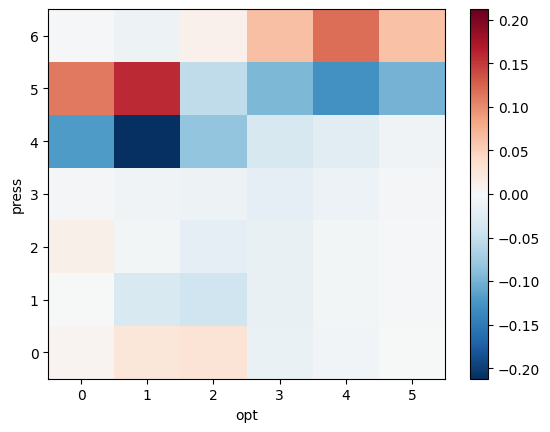

In [29]:
feed_r.plot()

In [30]:
feed_st

array([[0.00115918, 0.00515451, 0.00984852, 0.00744316, 0.00159241,
        0.0003811 ],
       [0.00177374, 0.00840028, 0.01156283, 0.00553332, 0.00234211,
        0.00061902],
       [0.00324401, 0.00646163, 0.00837015, 0.00630863, 0.00358577,
        0.00082123],
       [0.00396052, 0.006643  , 0.01030639, 0.01024029, 0.00684467,
        0.00175526],
       [0.01856402, 0.01820783, 0.02322865, 0.01945671, 0.0110626 ,
        0.00217305],
       [0.02566427, 0.04303598, 0.0468582 , 0.03365713, 0.02030593,
        0.01232168],
       [0.0031957 , 0.00598996, 0.00528964, 0.01217672, 0.01785726,
        0.01590222]])

# Aerosols

In [31]:
aod = xa.open_dataset("../daa/CERES_SYN1deg-Month_Terra-Aqua-MODIS_Ed4.1_Subset_200207-202407.nc", engine='netcdf4')

In [32]:
aod.ini_aod55_mon

<xarray.DataArray 'ini_aod55_mon' (time: 265, lat: 60, lon: 360)>
[5724000 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float32 -29.5 -28.5 -27.5 -26.5 -25.5 ... 26.5 27.5 28.5 29.5
  * time     (time) datetime64[ns] 2002-07-15 2002-08-15 ... 2024-07-15
Attributes:
    long_name:      Initial Meteorological Parameters: MATCH AOD @ 0.55 micro...
    standard_name:  Initial MATCH AOD @ 0.55 micron
    CF_name:        atmosphere_optical_thickness_due_to_ambient_aerosol
    comment:        none
    units:          dimensionless
    valid_min:             0
    valid_max:             5

In [33]:
aod_trop = aod.ini_aod55_mon.sel(time=ragutime).mean(['lat', 'lon'])
aod_trop

<xarray.DataArray 'ini_aod55_mon' (time: 222)>
array([0.21075246, 0.22944069, 0.21559356, 0.20323075, 0.1786211 ,
       0.1645022 , 0.173359  , 0.1837526 , 0.20646846, 0.19322646,
       0.20563991, 0.19738458, 0.20722213, 0.20366487, 0.20734084,
       0.18163976, 0.16029651, 0.1606359 , 0.161268  , 0.19288085,
       0.23532371, 0.18670325, 0.19357277, 0.20638789, 0.19034643,
       0.1983735 , 0.20281227, 0.18153258, 0.15089442, 0.15880735,
       0.19249412, 0.19462201, 0.200407  , 0.21442354, 0.20081168,
       0.20282163, 0.21192238, 0.22503766, 0.2368996 , 0.19084726,
       0.17033894, 0.16195516, 0.16554667, 0.17617665, 0.2085148 ,
       0.19320753, 0.18052427, 0.20046708, 0.21381253, 0.21686123,
       0.21587323, 0.20713858, 0.1821119 , 0.192368  , 0.19896123,
       0.19369337, 0.22272737, 0.20568097, 0.196247  , 0.19619834,
       0.20663475, 0.2144392 , 0.23302585, 0.19592105, 0.17663456,
       0.17496872, 0.18092616, 0.21274915, 0.20213339, 0.21173982,
       0.19749734, 0.2125241 , 0.2123376 , 0.21242447, 0.22077163,
       0.19988376, 0.17755009, 0.16974641, 0.17475359, 0.19406155,
       0.21245927, 0.20202994, 0.1945074 , 0.1927635 , 0.21759313,
       0.21900178, 0.21680532, 0.1877134 , 0.17245616, 0.17258656,
       0.17564622, 0.18625005, 0.2293525 , 0.21427087, 0.19780585,
       0.20158164, 0.21061553, 0.22622082, 0.22335187, 0.20218189,
...
       0.17243399, 0.18244347, 0.19003269, 0.20040816, 0.20370816,
       0.19618228, 0.21831712, 0.20867439, 0.21172309, 0.20519619,
       0.18513636, 0.16221833, 0.17503779, 0.17773345, 0.19869186,
       0.20839545, 0.20314018, 0.18434282, 0.20740293, 0.21136038,
       0.21274406, 0.21090497, 0.19416445, 0.17235838, 0.17754053,
       0.19254817, 0.19029482, 0.21634187, 0.21895906, 0.20624055,
       0.21827286, 0.21862902, 0.22606264, 0.23558526, 0.23276299,
       0.18643488, 0.19865938, 0.19363894, 0.22547409, 0.21606292,
       0.20520501, 0.1944601 , 0.20200145, 0.20410725, 0.21522705,
       0.20423195, 0.18357348, 0.17260042, 0.17563972, 0.16905029,
       0.19374146, 0.20250626, 0.20679079, 0.19394897, 0.19558261,
       0.2041636 , 0.20841984, 0.22134149, 0.19427857, 0.17379731,
       0.18703361, 0.19227132, 0.19809018, 0.20149843, 0.21411172,
       0.19122073, 0.21488103, 0.23400956, 0.22218668, 0.20852087,
       0.18927859, 0.1707376 , 0.17534003, 0.17664634, 0.19699363,
       0.21408868, 0.19838384, 0.18862951, 0.18984818, 0.20420185,
       0.2235397 , 0.23007508, 0.19109942, 0.17776652, 0.17066436,
       0.19861291, 0.21639423, 0.21068211, 0.20318136, 0.18868677,
       0.20366484, 0.20064914, 0.21400015, 0.21737994, 0.19135793,
       0.16549402, 0.16534023], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2002-07-15 2002-08-15 ... 2020-12-15

In [34]:
aod_anom_trop = methods.anomaly(aod_trop)

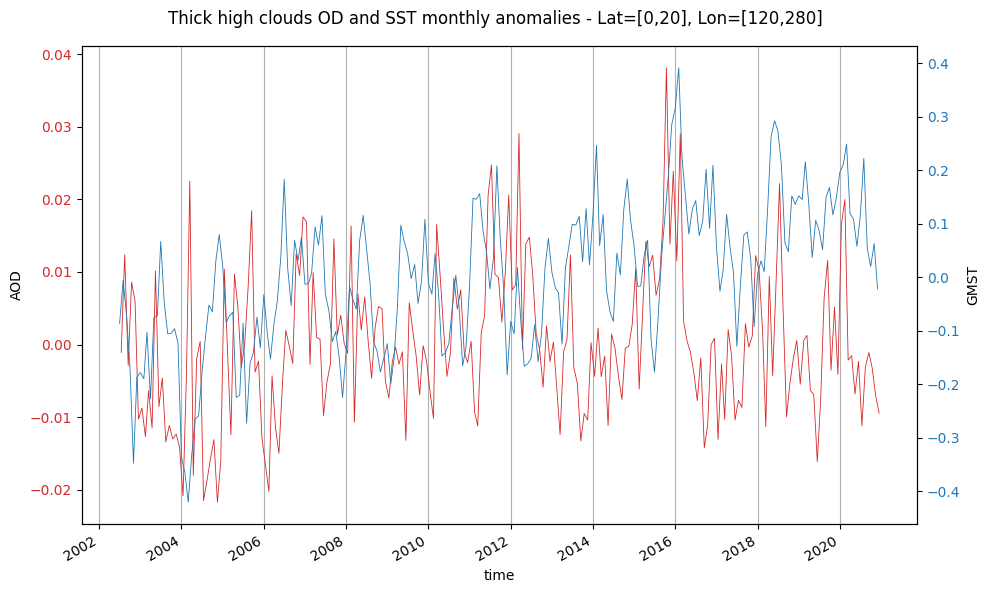

In [35]:

fig, ax1 = plt.subplots(figsize=(10, 6))

color = "tab:red"
(p1,) = aod_anom_trop.plot(
    linewidth=0.6,
    ax=ax1,
    color=color,
)
ax1.tick_params(
    axis="y",
    labelcolor=color,
)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = "tab:blue"
(p2,) = methods.anomaly(sst_trop).plot( #xa.DataArray(data=corregido, coords=[("time", aod_trop.time.data)])
    linewidth=0.6, ax=ax2, color=color
)  # ax2.plot(t, data2, color=color)
ax2.tick_params(
    axis="y",
    labelcolor=color,
)

plt.suptitle(
    "Thick high clouds OD and SST monthly anomalies - Lat=[0,20], Lon=[120,280]"
)
ax1.set_ylabel("AOD")
ax2.set_ylabel("GMST")
fig.tight_layout()  # otherwise the right y-label is slightly clipped
#ax1.xaxis.set_major_locator(mdates.YearLocator(base=1))
#ax1.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
ax1.grid(visible=True, axis="x")

plt.show()

In [36]:
xa.corr(aod_anom_trop, methods.anomaly(sst_trop)) #xa.DataArray(data=corregido, coords=[("time", aod_trop.time.data)])
#SIMILAR correlation coef GMST and trop sst anom ~0.1

/home/eepvrj/anaconda3/envs/sense2023/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/eepvrj/anaconda3/envs/sense2023/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


<xarray.DataArray ()>
array(nan)

In [37]:
aod_itcz = aod.ini_aod55_mon.sel(lat=itcz, time=ragutime).mean(['lat', 'lon'])

In [38]:
Xaod = np.column_stack((corregido.astype(np.float32), aod_anom_trop.astype(np.float32)))

In [39]:
hclw_aod = methods.Feedbacks(area_trop.sel(press=[4,5,6]), lwK_trop.sel(press=[4,5,6]), Xaod)
hcsw_aod = methods.Feedbacks(area_trop.sel(press=[4,5,6]), swK_trop.sel(press=[4,5,6]), Xaod)
hcnet_aod = methods.Feedbacks(area_trop.sel(press=[4,5,6]), K_trop.sel(press=[4,5,6]), Xaod)

In [40]:
methods.summary(hclw_aod, hcsw_aod, hcnet_aod,  (-0.39,0.3), (0.48,0.3), (0.09,0.12))

,lw_mean,lw_ci,sw_mean,sw_ci,net_mean,net_ci
Total,-0.3900,0.3000,0.4800,0.3000,0.0900,0.1200
Amount,-0.2899,0.3093,0.2468,0.3012,-0.0430,0.0652
Altitude,0.1344,0.0293,-0.0214,0.0064,0.1130,0.0241
Optical Depth,-0.1850,0.1253,0.2740,0.2028,0.0890,0.0902
Residual,-0.0229,0.0273,-0.0156,0.0093,-0.0385,0.0198


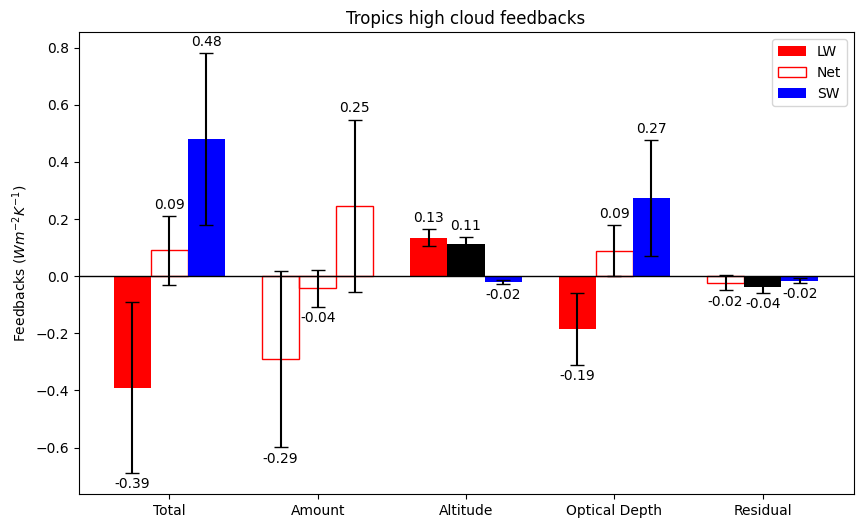

In [41]:
methods.plot(hclw_aod, hcsw_aod, hcnet_aod,  area="Tropics", totallw=(-0.39,0.3), totalsw=(0.48,0.3), totalnet=(0.09,0.12))

In [42]:
feed = np.zeros([len(pressdim), len(optdim)])
feed_st = np.zeros([len(pressdim), len(optdim)])

#x = sm.add_constant(x)

for od in optdim:
    for p in pressdim:
        bints = lwR_trop_mean.sel(press=p, opt=od).data
        regress = sm.OLS(endog=bints, exog=Xaod).fit()
        feed[p, od] = regress.params[0]
        feed_st[p, od] = regress.bse[0]

In [43]:
feed_r = xa.DataArray(
            feed,
            coords={
                "press": pressdim,
                "opt": optdim,
            },
        )

feed_stderr = xa.DataArray(
            feed_st,
            coords={
                "press": pressdim,
                "opt": optdim,
            },
        )

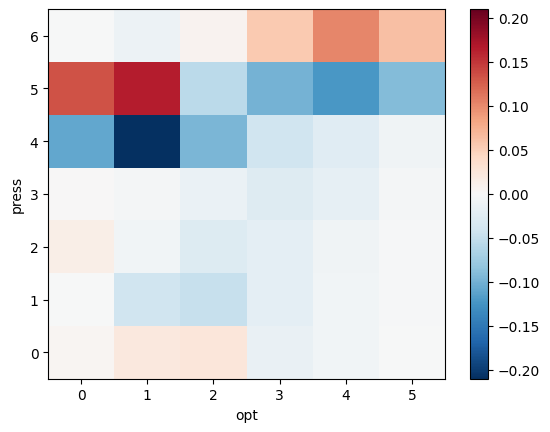

In [44]:
feed_r.plot()

In [45]:
regress.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.068
Model:                            OLS   Adj. R-squared (uncentered):              0.059
Method:                 Least Squares   F-statistic:                              8.010
Date:                Mon, 13 Jan 2025   Prob (F-statistic):                    0.000438
Time:                        04:58:11   Log-Likelihood:                          379.43
No. Observations:                 222   AIC:                                     -754.9
Df Residuals:                     220   BIC:                                     -748.0
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0634      0.016      4.002      0.000       0.032       0.095
x2            -0.2362      0.297     -0.794      0.428      -0.822       0.350
==============================================================================
Omnibus:                        0.967   Durbin-Watson:                   1.126
Prob(Omnibus):                  0.617   Jarque-Bera (JB):                0.658
Skew:                           0.080   Prob(JB):                        0.720
Kurtosis:                       3.213   Cond. No.                         19.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
feed_st

array([[0.00113976, 0.00502487, 0.00975646, 0.00736808, 0.00158103,
        0.00038031],
       [0.00176797, 0.00795998, 0.01127818, 0.00539163, 0.00229559,
        0.00061571],
       [0.00312189, 0.0064223 , 0.00790332, 0.00607004, 0.00350074,
        0.00081867],
       [0.00366346, 0.00636955, 0.01019687, 0.00997829, 0.00662144,
        0.00173967],
       [0.01821455, 0.01817701, 0.02283745, 0.01928391, 0.0110227 ,
        0.00216781],
       [0.02422966, 0.04281427, 0.04671366, 0.0335255 , 0.02025551,
        0.01203823],
       [0.00317136, 0.00587238, 0.00517727, 0.01188274, 0.01730887,
        0.01583851]])

## itcz

In [47]:
RclrLW_itcz = alllw.sel(lat=itcz,lon=ocean_only, time=ragutime).toa_lw_clr_mon.mean("lon")
RovcLW_itcz = alllw.sel(lat=itcz,lon=ocean_only, time=ragutime).toa_lw_cldtyp_mon.mean("lon")
lwK_itcz = (RclrLW_itcz - RovcLW_itcz)/100

RclrSW_itcz = allsw.sel(lat=itcz,lon=ocean_only,time=ragutime).toa_sw_clr_mon.mean("lon")
RovcSW_itcz = allsw.sel(lat=itcz,lon=ocean_only,time=ragutime).toa_sw_cldtyp_mon.mean("lon")
swK_itcz = (RclrSW_itcz - RovcSW_itcz)/100

K_itcz = swK_itcz + lwK_itcz

In [48]:
#2
area_itcz = alllw.cldarea_cldtyp_mon.sel(lat=itcz, lon=ocean_only,time=ragutime).mean("lon")
cc_itcz_anom = area_itcz.groupby('time.month')- area_itcz.groupby('time.month').mean('time')

In [49]:
Xaod = np.column_stack((corregido.astype(np.float32), aod_anom_itcz.astype(np.float32)))

NameError: name 'aod_anom_itcz' is not defined

In [ ]:
hclw_itcz = methods.Feedbacks(area_itcz.sel(press=[4,5,6]), lwK_itcz.sel(press=[4,5,6]), corregido)
hcsw_itcz = methods.Feedbacks(area_itcz.sel(press=[4,5,6]), swK_itcz.sel(press=[4,5,6]), corregido)
hcnet_itcz = methods.Feedbacks(area_itcz.sel(press=[4,5,6]), K_itcz.sel(press=[4,5,6]), corregido)

## Warm pool

In [54]:
#sel press antes o despues de mean lon? puede ser causa del error
area_wa = alllw.cldarea_cldtyp_mon.sel(lat=warm_pool, lon=wa,time=ragutime).mean("lon")

RclrLW_wa = alllw.sel(lat=warm_pool,lon=wa, time=ragutime).toa_lw_clr_mon.mean("lon")
RovcLW_wa = alllw.sel(lat=warm_pool,lon=wa, time=ragutime).toa_lw_cldtyp_mon.mean("lon")
lwK_wa = (RclrLW_wa - RovcLW_wa)/100

RclrSW_wa = allsw.sel(lat=warm_pool,lon=wa, time=ragutime).toa_sw_clr_mon.mean("lon")
RovcSW_wa = allsw.sel(lat=warm_pool,lon=wa, time=ragutime).toa_sw_cldtyp_mon.mean("lon")
swK_wa = (RclrSW_wa - RovcSW_wa)/100

K_wa = lwK_wa + swK_wa


In [55]:
aod_wa = aod.ini_aod55_mon.sel(lat=warm_pool, lon=wa, time=ragutime)
logaod_wa_mean = xa.DataArray(data= np.log(aod_wa.data).mean(axis=(1,2)), coords={"time":aod_wa.time})
logaod_wa_anom = methods.anomaly(logaod_wa_mean)
logaod_wa_anom.data

array([-4.66271639e-02,  1.51213646e-01,  1.38154507e-01,  1.18673325e-01,
        4.75578308e-02, -1.14404202e-01, -5.01611233e-02, -5.03679514e-02,
       -1.31887317e-01, -1.06432915e-01,  3.60299349e-02, -1.02572203e-01,
       -9.26294327e-02, -1.28841877e-01, -8.89618397e-02, -1.81639791e-01,
       -5.75482845e-02, -2.69875526e-02, -1.21145368e-01, -1.15647316e-02,
        1.08333826e-02, -5.50385714e-02, -3.07071209e-03,  2.48434544e-02,
       -2.09609866e-01,  1.37435198e-02, -1.98609352e-01,  1.10832810e-01,
       -7.25228786e-02, -1.04265451e-01,  4.20526266e-02,  2.89716721e-02,
        1.62361860e-02,  1.47497177e-01,  2.20913887e-02,  3.75176668e-02,
        4.41135168e-02,  8.63941908e-02, -2.69569159e-02, -2.08789945e-01,
       -8.79927874e-02, -8.61096382e-03, -3.63749266e-02, -8.72528553e-02,
        6.58091307e-02,  4.86519337e-02, -6.64637089e-02, -6.54011965e-02,
        5.71572781e-02,  4.03780937e-02,  4.06928062e-02,  3.71992350e-01,
        2.06878304e-01,  

In [56]:
logX_wa = np.column_stack((corregido.astype(np.float32), logaod_wa_anom.astype(np.float32)))

In [57]:
hclw_wa = methods.Feedbacks(area_wa.sel(press=[4,5,6]), lwK_wa.sel(press=[4,5,6]), logX_wa)
hcsw_wa = methods.Feedbacks(area_wa.sel(press=[4,5,6]), swK_wa.sel(press=[4,5,6]), logX_wa)
hcnet_wa = methods.Feedbacks(area_wa.sel(press=[4,5,6]), K_wa.sel(press=[4,5,6]), logX_wa)

In [58]:
methods.summary(hclw_wa, hcsw_wa, hcnet_wa,  totallw= (-9.44051633640516, 2.8064423613090046), totalsw=(10.331767747765594, 2.9600412835384033), totalnet=(0.8912481889574548, 0.8573478531012195))

,lw_mean,lw_ci,sw_mean,sw_ci,net_mean,net_ci
Total,-9.4405,2.8064,10.3318,2.9600,0.8912,0.8573
Amount,-7.3762,3.5153,7.2159,3.5481,-0.1602,0.2532
Altitude,0.1783,0.1098,-0.0514,0.0311,0.1269,0.0826
Optical Depth,-1.2891,0.8761,2.0513,1.4137,0.7622,0.5628
Residual,-0.2782,0.1667,0.0448,0.0722,-0.2333,0.0994


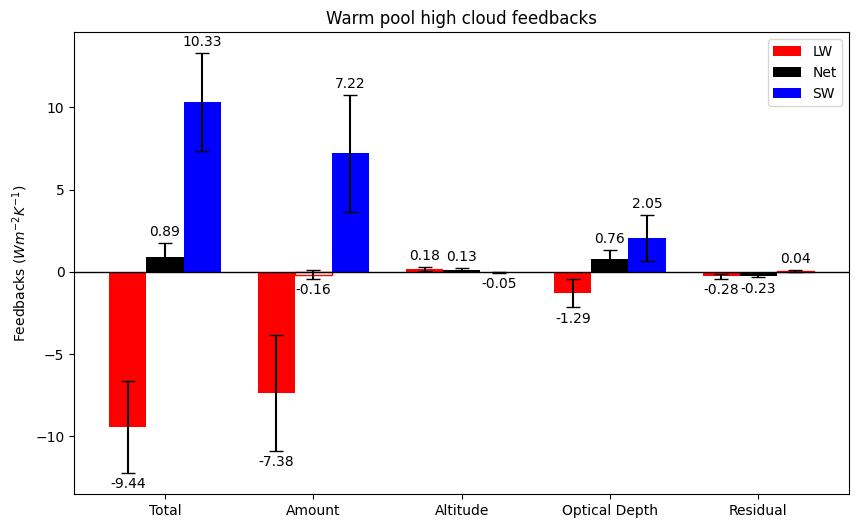

In [60]:
methods.plot(hclw_wa, hcsw_wa, hcnet_wa, area="Warm pool", totallw= (-9.44051633640516, 2.8064423613090046), totalsw=(10.331767747765594, 2.9600412835384033), totalnet=(0.8912481889574548, 0.8573478531012195))

## WP 

In [ ]:
#sel press antes o despues de mean lon? puede ser causa del error
area_wp = alllw.cldarea_cldtyp_mon.sel(lat=itcz, lon=wp,time=ragutime).mean("lon")

RclrLW_wp = alllw.sel(lat=itcz,lon=wp, time=ragutime).toa_lw_clr_mon.mean("lon")
RovcLW_wp = alllw.sel(lat=itcz,lon=wp, time=ragutime).toa_lw_cldtyp_mon.mean("lon")
lwK_wp = (RclrLW_wp - RovcLW_wp)/100

RclrSW_wp = allsw.sel(lat=itcz,lon=wp, time=ragutime).toa_sw_clr_mon.mean("lon")
RovcSW_wp = allsw.sel(lat=itcz,lon=wp, time=ragutime).toa_sw_cldtyp_mon.mean("lon")
swK_wp = (RclrSW_wp - RovcSW_wp)/100

K_wp = lwK_wp + swK_wp


In [ ]:
aod_wp = aod.ini_aod55_mon.sel(lat=itcz, lon=wp, time=ragutime)
logaod_wp_mean = xa.DataArray(data= np.log(aod_wp.data).mean(axis=(1,2)), coords={"time":aod_wp.time})
logaod_wp_anom = methods.anomaly(logaod_wp_mean)
logaod_wp_anom.data

array([ 1.03495717e-01,  1.67809963e-01,  1.65062547e-01,  1.96933746e-03,
        4.20832634e-02, -1.07800245e-01,  1.45747662e-02, -7.81686306e-02,
       -1.19992852e-01, -9.03180838e-02,  1.90451860e-01,  5.53607941e-04,
       -1.64791942e-01, -2.31506467e-01, -7.43253231e-02, -1.11548424e-01,
        6.18815422e-03,  1.31504536e-02, -1.63822174e-01,  4.75575924e-02,
        9.45656300e-02,  6.82700872e-02, -1.91252232e-02,  2.36343861e-01,
       -3.12423110e-01,  2.08564997e-01, -4.52156305e-01,  1.63476467e-01,
       -1.54498100e-01, -1.54484272e-01,  8.56781006e-02,  3.81023884e-02,
       -3.80516052e-04,  3.47538114e-01,  2.71198153e-01,  1.14800096e-01,
        1.33849621e-01,  1.93227410e-01,  9.96507406e-02, -2.64176369e-01,
        8.86416435e-03,  1.55773163e-01,  5.51555157e-02,  5.48251867e-02,
        9.24978256e-02,  7.72998333e-02, -3.35018635e-02, -1.04224920e-01,
        1.54766560e-01,  7.02085495e-02, -7.17539787e-02,  5.26987910e-01,
        8.40592384e-03,  

In [ ]:
logX_wp = np.column_stack((corregido.astype(np.float32), logaod_wp_anom.astype(np.float32)))

In [ ]:
hclw_wp = methods.Feedbacks(area_wp.sel(press=[4,5,6]), lwK_wp.sel(press=[4,5,6]), logX_wp)
hcsw_wp = methods.Feedbacks(area_wp.sel(press=[4,5,6]), swK_wp.sel(press=[4,5,6]), logX_wp)
hcnet_wp = methods.Feedbacks(area_wp.sel(press=[4,5,6]), K_wp.sel(press=[4,5,6]), logX_wp)

In [ ]:
methods.summary(hclw_wp, hcsw_wp, hcnet_wp,  totallw= (-9.44051633640516, 2.8064423613090046), totalsw=(10.331767747765594, 2.9600412835384033), totalnet=(0.8912481889574548, 0.8573478531012195))

,lw_mean,lw_ci,sw_mean,sw_ci,net_mean,net_ci
Total,-9.4405,2.8064,10.3318,2.9600,0.8912,0.8573
Amount,-6.1984,3.3643,5.8235,3.3328,-0.3749,0.4314
Altitude,0.1419,0.1363,-0.0393,0.0445,0.1029,0.1015
Optical Depth,-0.5664,1.0039,1.1949,1.6331,0.6274,0.6714
Residual,-0.1169,0.2454,0.0247,0.1220,-0.0913,0.1345


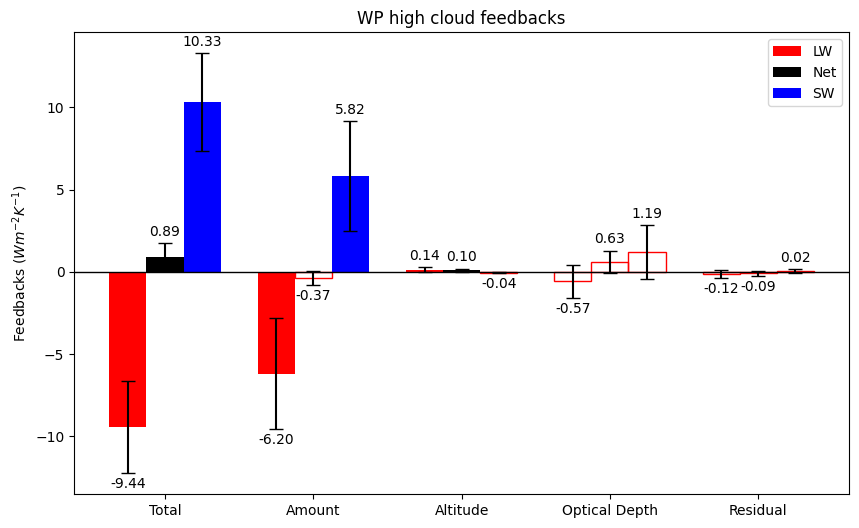

In [ ]:
methods.plot(hclw_wp, hcsw_wp, hcnet_wp,  area="WP", totallw= (-9.44051633640516, 2.8064423613090046), totalsw=(10.331767747765594, 2.9600412835384033), totalnet=(0.8912481889574548, 0.8573478531012195))

## EP

In [ ]:
area_ep = alllw.cldarea_cldtyp_mon.sel(lat=itcz, lon=ep,time=ragutime).mean("lon")

RclrLW_ep = alllw.sel(lat=itcz,lon=ep, time=ragutime).toa_lw_clr_mon.mean("lon")
RovcLW_ep = alllw.sel(lat=itcz,lon=ep, time=ragutime).toa_lw_cldtyp_mon.mean("lon")
lwK_ep = (RclrLW_ep - RovcLW_ep)/100

RclrSW_ep = allsw.sel(lat=itcz,lon=ep, time=ragutime).toa_sw_clr_mon.mean("lon")
RovcSW_ep = allsw.sel(lat=itcz,lon=ep, time=ragutime).toa_sw_cldtyp_mon.mean("lon")
swK_ep = (RclrSW_ep - RovcSW_ep)/100

K_ep = lwK_ep + swK_ep

In [ ]:
aod_ep = aod.ini_aod55_mon.sel(lat=itcz, lon=ep, time=ragutime)
logaod_ep_mean = xa.DataArray(data= np.log(aod_ep.data).mean(axis=(1,2)), coords={"time":aod_ep.time})
logaod_ep_anom = methods.anomaly(logaod_ep_mean)
logaod_ep_anom.data

array([ 0.0331676 ,  0.09902644, -0.01453257,  0.09892797,  0.08613539,
       -0.01428819, -0.01387358, -0.09084535, -0.17444563,  0.02261746,
        0.1190964 , -0.20513988, -0.07850623, -0.08936667, -0.08061719,
       -0.10382938, -0.08736682, -0.09306884, -0.26823688, -0.13983297,
        0.12468219, -0.1531775 , -0.17392087, -0.15420794, -0.21479869,
       -0.13402343, -0.1988647 , -0.20528841, -0.28027582, -0.11197352,
       -0.06269979,  0.05552983, -0.2705245 ,  0.1268593 , -0.00778985,
        0.0224365 , -0.03001261, -0.05374479,  0.13545585,  0.03031754,
        0.23024213, -0.16429973,  0.05095506,  0.00932765, -0.0709269 ,
       -0.01317036, -0.09250998, -0.06772971,  0.00665665, -0.0718019 ,
       -0.02488327,  0.06765699,  0.04722118,  0.09259796,  0.10709429,
       -0.01866603,  0.06238544, -0.12392068,  0.0936811 , -0.03137445,
       -0.07204366, -0.12130904, -0.04910302, -0.07361746,  0.02085471,
        0.00298691,  0.02202296, -0.12955022, -0.08113146,  0.03

In [ ]:
logX_ep = np.column_stack((corregido.astype(np.float32), logaod_ep_anom.astype(np.float32)))

In [ ]:
hclw_ep = methods.Feedbacks(area_ep.sel(press=[4,5,6]), lwK_ep.sel(press=[4,5,6]), logX_ep)
hcsw_ep = methods.Feedbacks(area_ep.sel(press=[4,5,6]), swK_ep.sel(press=[4,5,6]), logX_ep)
hcnet_ep = methods.Feedbacks(area_ep.sel(press=[4,5,6]), K_ep.sel(press=[4,5,6]), logX_ep)

In [ ]:
methods.summary(hclw_ep, hcsw_ep, hcnet_ep, totallw= (5.026977098302147, 1.675674348286281), totalsw=(-5.794989170353057, 1.9115519927932088), totalnet=(-0.76801275225733, 0.5760341489283894))

,lw_mean,lw_ci,sw_mean,sw_ci,net_mean,net_ci
Total,5.0270,1.6757,-5.7950,1.9116,-0.7680,0.5760
Amount,3.5856,2.4372,-4.4805,2.7744,-0.8949,0.4543
Altitude,0.1842,0.0800,0.0173,0.0281,0.2014,0.0654
Optical Depth,-0.2883,0.3525,0.3172,0.6749,0.0288,0.3439
Residual,0.0523,0.0875,-0.0936,0.0560,-0.0412,0.0499


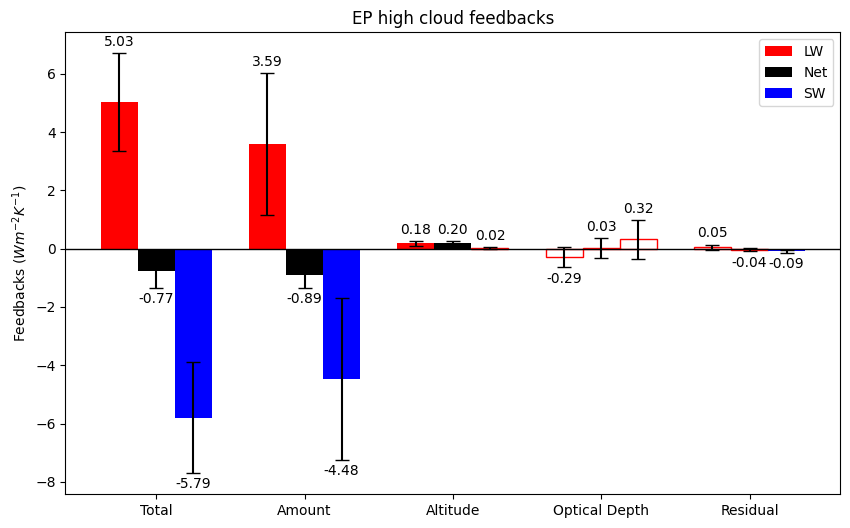

In [ ]:
methods.plot(hclw_ep, hcsw_ep, hcnet_ep, area="EP", totallw= (5.026977098302147, 1.675674348286281), totalsw=(-5.794989170353057, 1.9115519927932088), totalnet=(-0.76801275225733, 0.5760341489283894))

## CP

In [ ]:
#sel press antes o despues de mean lon? puede ser causa del error
area_cp = alllw.cldarea_cldtyp_mon.sel(lat=itcz, lon=cp,time=ragutime).mean("lon")

RclrLW_cp = alllw.sel(lat=itcz,lon=cp, time=ragutime).toa_lw_clr_mon.mean("lon")
RovcLW_cp = alllw.sel(lat=itcz,lon=cp, time=ragutime).toa_lw_cldtyp_mon.mean("lon")
lwK_cp = (RclrLW_cp - RovcLW_cp)/100

RclrSW_cp = allsw.sel(lat=itcz,lon=cp, time=ragutime).toa_sw_clr_mon.mean("lon")
RovcSW_cp = allsw.sel(lat=itcz,lon=cp, time=ragutime).toa_sw_cldtyp_mon.mean("lon")
swK_cp = (RclrSW_cp - RovcSW_cp)/100

K_cp = lwK_cp + swK_cp

In [ ]:
aod_cp = aod.ini_aod55_mon.sel(lat=itcz, lon=cp, time=ragutime)
logaod_cp_mean = xa.DataArray(data= np.log(aod_cp.data).mean(axis=(1,2)), coords={"time":aod_cp.time})
logaod_cp_anom = methods.anomaly(logaod_cp_mean)

In [ ]:
logX_cp = np.column_stack((corregido.astype(np.float32), logaod_cp_anom.astype(np.float32)))

In [ ]:
hclw_cp = methods.Feedbacks(area_cp.sel(press=[4,5,6]), lwK_cp.sel(press=[4,5,6]), logX_cp)
hcsw_cp = methods.Feedbacks(area_cp.sel(press=[4,5,6]), swK_cp.sel(press=[4,5,6]), logX_cp)
hcnet_cp = methods.Feedbacks(area_cp.sel(press=[4,5,6]), K_cp.sel(press=[4,5,6]), logX_cp)

In [ ]:
methods.summary(hclw_cp, hcsw_cp, hcnet_cp, totallw= (6.8705518072760725 ,2.4877546369137686), totalsw=(-6.518872482955505, 2.5567467982061474), totalnet=(0.35167901589319833, 0.8420146034975553))

,lw_mean,lw_ci,sw_mean,sw_ci,net_mean,net_ci
Total,6.8706,2.4878,-6.5189,2.5567,0.3517,0.8420
Amount,5.0121,3.3268,-5.4731,3.2726,-0.4611,0.4245
Altitude,0.2383,0.1021,-0.0168,0.0662,0.2215,0.0729
Optical Depth,0.6214,0.8470,-0.6345,1.3554,-0.0132,0.5751
Residual,0.4328,0.2102,-0.2060,0.1214,0.2268,0.1202


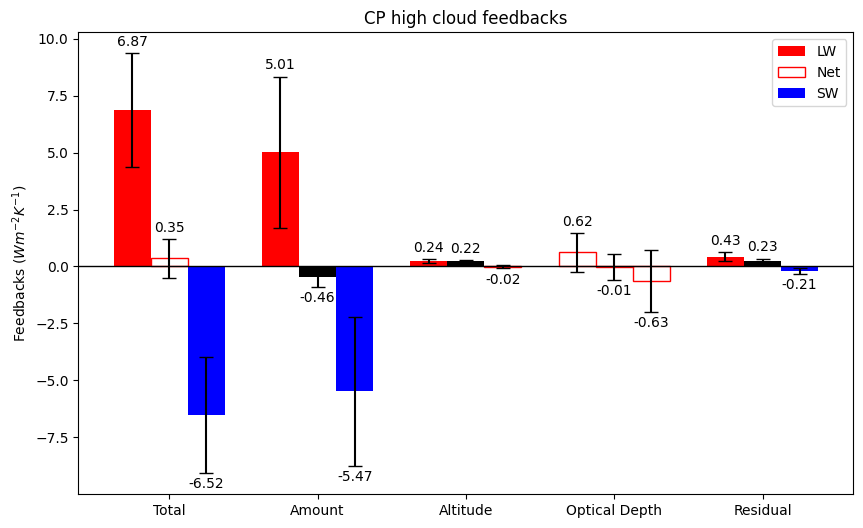

In [ ]:
methods.plot(hclw_cp, hcsw_cp, hcnet_cp, area="CP", totallw= (6.8705518072760725 ,2.4877546369137686), totalsw=(-6.518872482955505, 2.5567467982061474), totalnet=(0.35167901589319833, 0.8420146034975553))

In [ ]:
(100*(3.5694-3.3643))/3.5694

5.746063764218071